# Star Classification Problem

## Context
Stellar Classification uses the spectral data of stars to categorize them into different categories. The modern stellar classification system is known as the Morgan–Keenan (MK) classification system. It uses the old HR classification system to categorize stars with their chromaticity and uses Roman numerals to categorize the star’s size. In this Dataset, we will be using Absolute Magnitude and B-V Color Index to Identify Giants and Dwarfs.


## Feature Description:
- Vmag: 
Visual Apparent Magnitude of the Star

- Plx: 
Distance Between the Star and the Earth

- e_Plx
Standard Error of Plx (Drop the Row if you find the e_Plx is too high!)

- B-V: 
B-V color index. (A hot star has a B-V color index close to 0 or negative, while a cool star has a B-V color index close to 2.0. Other stars are somewhere in between.)

- SpType: 
Spectral type

- Amag: 
Absolute Magnitude of the Star

- TargetClass: 
Whether the Star is Dwarf (0) or Giant (1)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Star_Training.csv")
df.head(10)

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,10.00,31.66,6.19,1.213,K7V,22.502556,1
1,8.26,3.21,1.00,1.130,K0III,15.792525,0
2,8.27,12.75,1.06,0.596,F9V,18.797552,1
3,6.54,5.23,0.76,1.189,K1III,15.132508,0
4,8.52,0.96,0.72,0.173,B8V,13.431356,1
5,6.09,6.02,0.95,0.040,B8IVn,14.987983,1
6,7.94,5.36,0.61,1.066,K0III,16.585825,0
7,6.81,13.13,1.04,1.030,K1III,17.401323,0
8,7.68,0.66,0.62,0.013,B2V:e,11.777719,1
9,8.78,8.26,1.14,0.682,G2IV,18.364899,1


In [71]:
df.shape

(39552, 7)

In [72]:
df.isnull().sum()

Vmag           0
Plx            0
e_Plx          0
B-V            0
SpType         0
Amag           0
TargetClass    0
dtype: int64

In [73]:
df.describe()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
count,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000,39552.000000
mean,7.921309,7.117378,1.109705,0.744336,16.050687,0.500000
std,1.308857,12.446291,0.788133,0.513987,2.443937,0.500006
min,-0.620000,-27.840000,0.420000,-0.400000,-0.350000,0.000000
25%,7.210000,2.430000,0.800000,0.358000,14.756514,0.000000
50%,8.160000,4.440000,0.990000,0.703000,16.020827,0.500000
75%,8.830000,8.232500,1.230000,1.129000,17.590542,1.000000
max,12.850000,772.330000,40.630000,3.440000,30.449015,1.000000


In [74]:
df.dtypes

Vmag           float64
Plx            float64
e_Plx          float64
B-V            float64
SpType          object
Amag           float64
TargetClass      int64
dtype: object

**Now we will take a look at the only categorical variable in our dataset i.e SpType**

In [75]:
len(df.SpType.unique())

2576

In [76]:
df.SpType.value_counts()

K0III          2841
K1III          1742
K2III          1479
G8III          1474
K3III          1097
               ... 
B2IIn...          1
A3II-III          1
M6IIIe            1
M1Ib              1
K3IIICNpvar       1
Name: SpType, Length: 2576, dtype: int64

In [77]:
len(df.SpType.value_counts())

2576

**As seen above the number of different SpTypes is 2576 which is a large number of values for a categorical variable it does not make any sense to use this variable so we will drop this column**

In [78]:
df.drop(columns=["SpType"], inplace=True)
df.head()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,10.00,31.66,6.19,1.213,22.502556,1
1,8.26,3.21,1.00,1.130,15.792525,0
2,8.27,12.75,1.06,0.596,18.797552,1
3,6.54,5.23,0.76,1.189,15.132508,0
4,8.52,0.96,0.72,0.173,13.431356,1


# Analysing e_Plx

As suggested in the data description we have to eleminate the higher values of e_Plx for this we will use the criterion for outlier detection:

#### Formula:

**Max Value = Q3 + 1.5*IQR**

- Q1 = 25% of data
- Q2 = 50% of data
- Q3 = 75% of data
- IQR (Inter-quartile Range) = Q3 - Q1

In [79]:
df = df[df["e_Plx"] < 2.0]
df.head()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
1,8.26,3.21,1.00,1.130,15.792525,0
2,8.27,12.75,1.06,0.596,18.797552,1
3,6.54,5.23,0.76,1.189,15.132508,0
4,8.52,0.96,0.72,0.173,13.431356,1
5,6.09,6.02,0.95,0.040,14.987983,1


In [80]:
df.shape

(37970, 6)

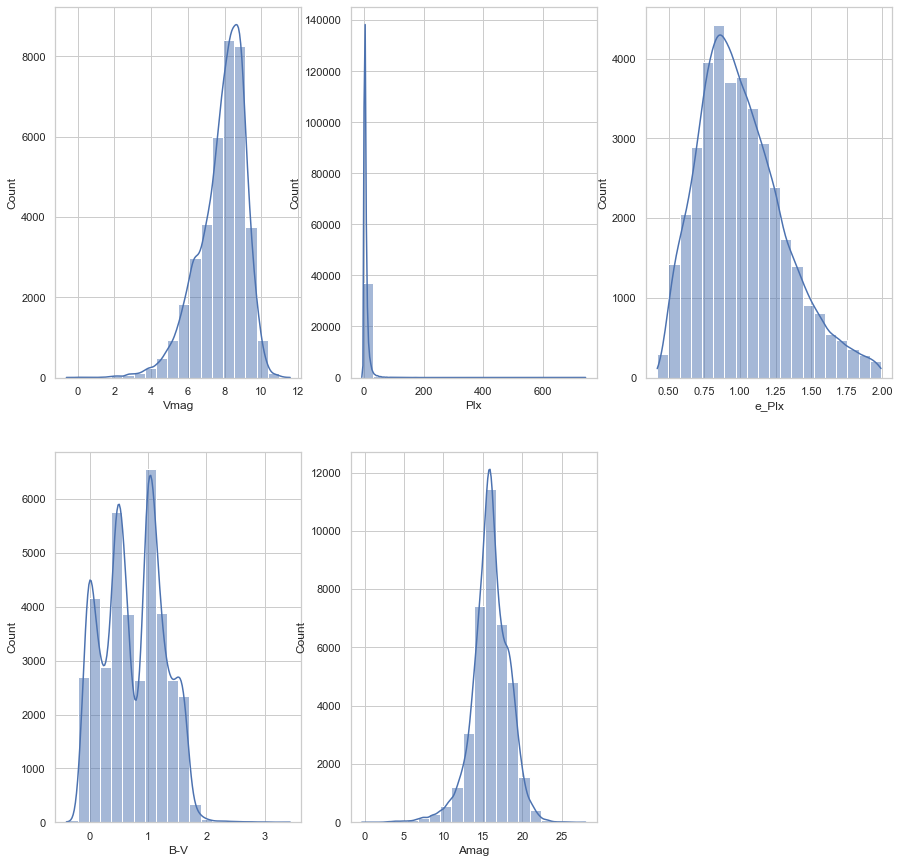

In [81]:
figure = plt.figure(figsize=(15,15))
sns.set_theme()
sns.set_style("whitegrid")

j = 1
for i in list(df.columns)[:5]:
    plt.subplot(2, 3, j)
    sns.histplot(df[i], kde=True, bins = 20)
    j+=1
    

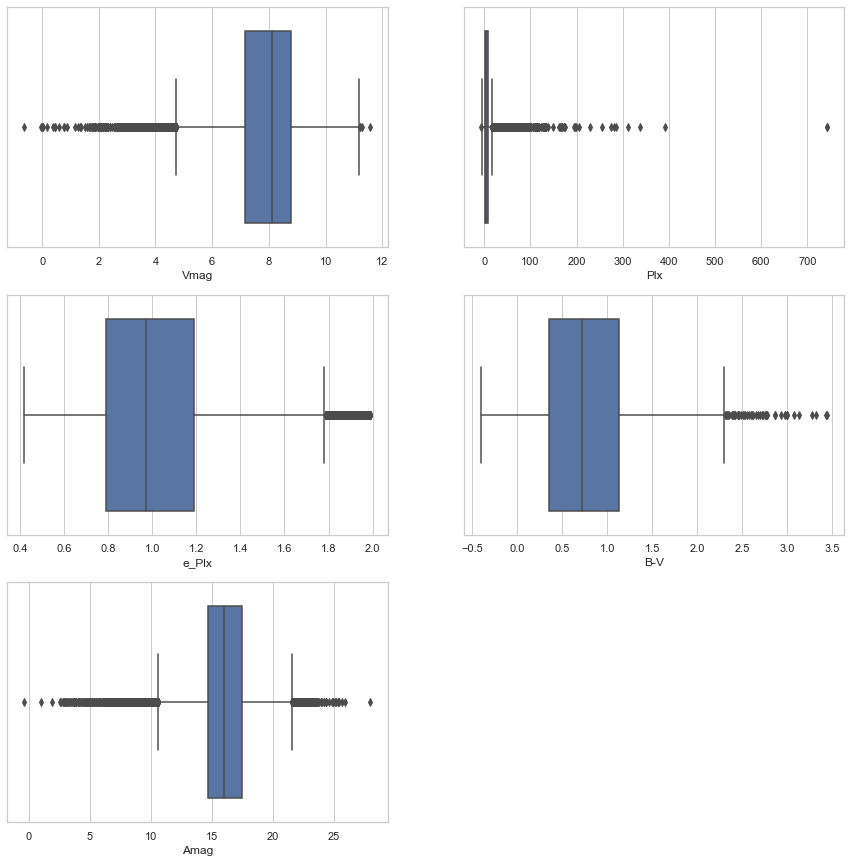

In [82]:
figure = plt.figure(figsize=(15,15))
sns.set_theme()
sns.set_style("whitegrid")

j = 1
for i in list(df.columns)[:5]:
    plt.subplot(3, 2, j)
    sns.boxplot(x=df[i])
    j+=1
    

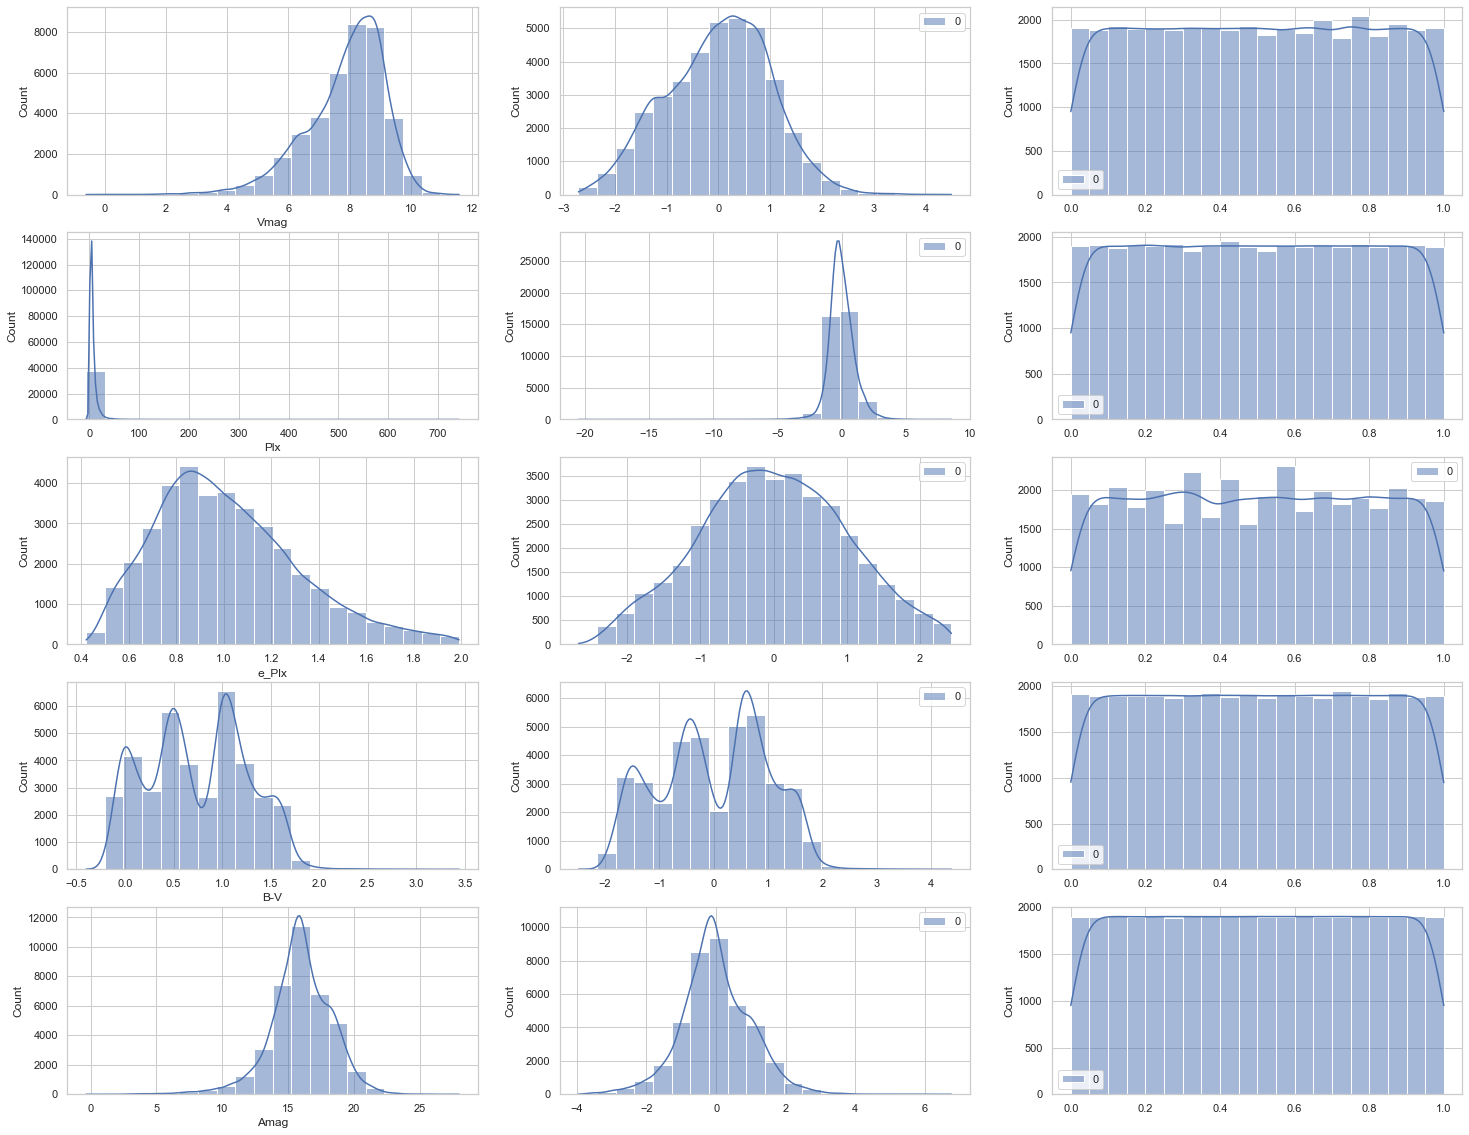

In [83]:
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

power = PowerTransformer(method="yeo-johnson")
quantile = QuantileTransformer(n_quantiles=250, output_distribution="uniform")

figure = plt.figure(figsize=(25,20))
sns.set_theme()
sns.set_style("whitegrid")

j = 1
for i in list(df.columns)[:5]:
    array = np.array(df[i]).reshape(-1, 1)
    p = power.fit_transform(array)
    q = quantile.fit_transform(array)
    
    plt.subplot(5, 3, j)
    sns.histplot(df[i], kde=True, bins=20)
    plt.subplot(5, 3, j+1)
    sns.histplot(p, kde=True, bins=20)
    plt.subplot(5, 3, j+2)
    sns.histplot(q, kde=True, bins=20)
    j+=3
    

In [84]:
power = PowerTransformer(method="yeo-johnson")

for i in list(df.columns)[:5]:
    array = np.array(df[i]).reshape(-1, 1)
    df[i] = power.fit_transform(array)

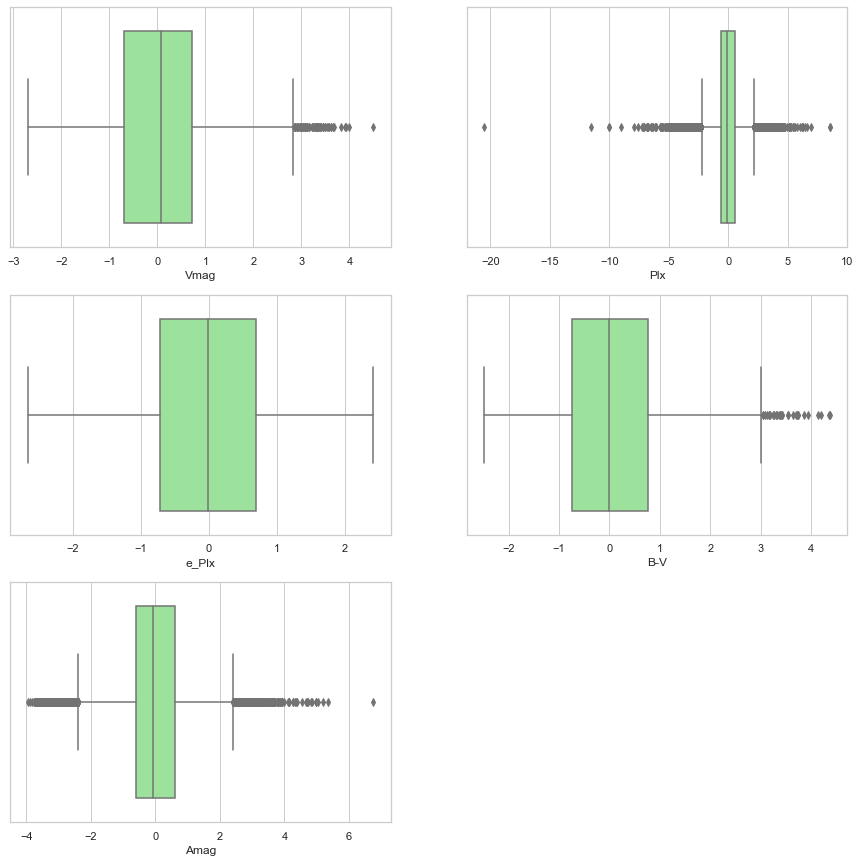

In [85]:
figure = plt.figure(figsize=(15,15))
sns.set_theme()
sns.set_style("whitegrid")

j = 1
for i in list(df.columns)[:5]:
    plt.subplot(3, 2, j)
    sns.boxplot(x=df[i], color="lightgreen")
    j+=1

Text(0.5, 0, 'Absolute Magnitude')

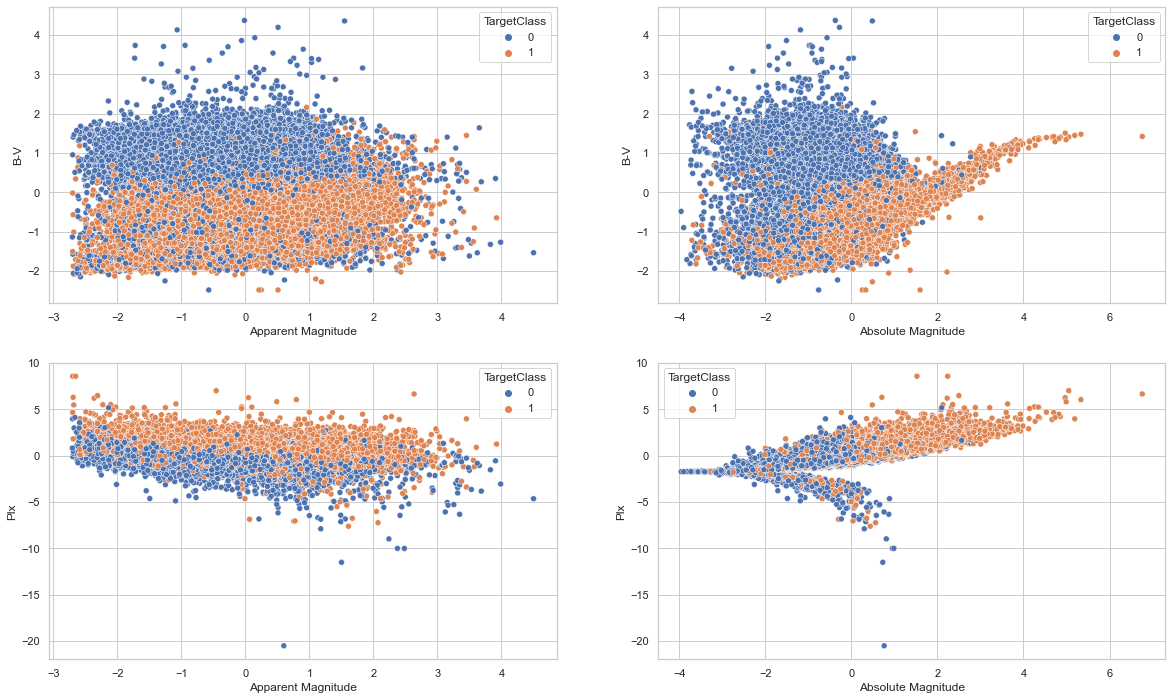

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(20,12))
sns.set_theme()
sns.set_style("whitegrid")

sns.scatterplot(data = df, x = 'Vmag', y= 'B-V', ax = axes[0][0], hue = 'TargetClass')
axes[0,0].set_xlabel('Apparent Magnitude')

sns.scatterplot(data = df, x = 'Amag',  y= 'B-V', ax = axes[0][1], hue = 'TargetClass')
axes[0,1].set_xlabel('Absolute Magnitude')


sns.scatterplot(data = df, x = 'Vmag', y = 'Plx', ax = axes[1][0], hue='TargetClass')
axes[1,0].set_xlabel('Apparent Magnitude')


sns.scatterplot(data = df, x = 'Amag', y = 'Plx', ax = axes[1][1], hue = 'TargetClass')
axes[1,1].set_xlabel('Absolute Magnitude')

<AxesSubplot:>

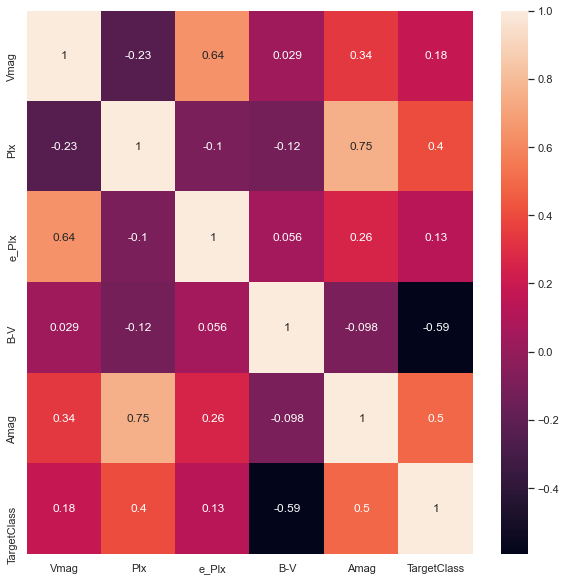

In [87]:
fig = plt.figure(figsize=(10,10))
sns.set_theme()
sns.heatmap(df.corr(), annot=True)

In [3]:
from pandas_profiling import profile_report
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [90]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :5].values
Y = df.iloc[:, 5].values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

clf1 = LogisticRegression()
clf1.fit(x_train, y_train)
accuracy = clf1.score(x_test, y_test)
predict = clf1.predict(x_test)
f1 = f1_score(predict, y_test)

print("Logistic Regression:")
print(f"Accuracy: {accuracy}")
print(f"F1- Score: {f1}")

Logistic Regression:
Accuarcay: 0.8805636028443508
F1- Score: 0.8793722569490624


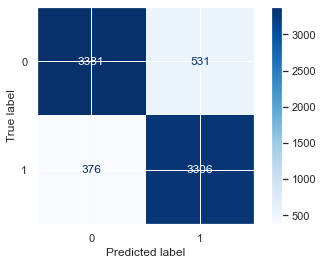

In [96]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(clf1, x_test, y_test,labels=[0,1],cmap='Blues')

In [97]:
from sklearn.neighbors import KNeighborsClassifier

clf2 = KNeighborsClassifier()
clf2.fit(x_train, y_train)
accuracy = clf2.score(x_test, y_test)
predict = clf2.predict(x_test)
f1 = f1_score(predict, y_test)

print("KNN:")
print(f"Accuracy: {accuracy}")
print(f"F1- Score: {f1}")

Logistic Regression:
Accuarcay: 0.8767447985251514
F1- Score: 0.8738204367754111


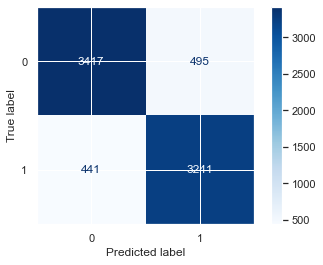

In [98]:
plot_confusion_matrix(clf2, x_test, y_test,labels=[0,1],cmap='Blues')

In [102]:
from sklearn.svm import SVC

clf3 = SVC(kernel="rbf")
clf3.fit(x_train, y_train)
accuracy = clf3.score(x_test, y_test)
predict = clf3.predict(x_test)
f1 = f1_score(predict, y_test)

print("SVC:")
print(f"Accuracy: {accuracy}")
print(f"F1- Score: {f1}")

SVC:
Accuarcay: 0.8845140900711088
F1- Score: 0.8842855257949598


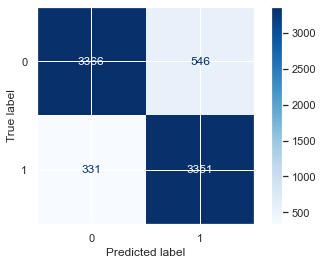

In [101]:
plot_confusion_matrix(clf3, x_test, y_test,labels=[0,1],cmap='Blues')

<ipython-input-108-e160bfdbcd68>:14: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


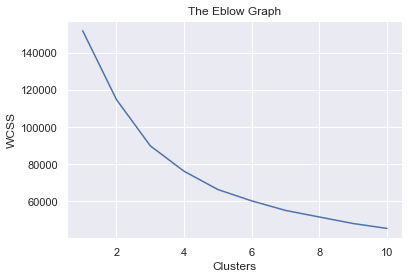

In [108]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    clf4 = KMeans(n_clusters=i, max_iter=300)
    clf4.fit(x_train)
    wcss.append(clf4.inertia_)
    
plt.plot([i for i in range(1, 11)], wcss)
plt.title('The Eblow Graph')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [111]:
df.shape

(37970, 6)

In [123]:
kmeans = KMeans(n_clusters = 3, max_iter = 300)
pred = kmeans.fit_predict(df.iloc[:, :5].values)

df_cluster = df.copy()
df_cluster.drop(columns =["TargetClass"], inplace=True)

df_cluster['Categories'] = pred
df_cluster.head()

,Vmag,Plx,e_Plx,B-V,Amag,Categories
1,0.201374,-0.355531,0.091774,0.760252,-0.141407,2
2,0.210685,1.056249,0.292790,-0.241636,1.251463,1
3,-1.124016,0.080935,-0.840167,0.865456,-0.419991,0
4,0.449938,-1.127809,-1.019140,-1.118221,-1.092075,2
5,-1.387480,0.219764,-0.084594,-1.414835,-0.479668,0


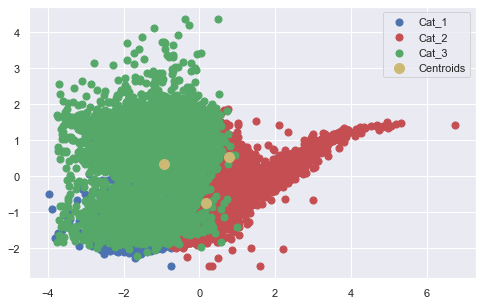

In [124]:
df_0 = df_cluster[df_cluster['Categories'] == 0]
df_1 = df_cluster[df_cluster['Categories'] == 1]
df_2 = df_cluster[df_cluster['Categories'] == 2]

plt.figure(figsize=(8,5))

plt.scatter(df_0.iloc[:, 4], df_0.iloc[:, 3] , color = 'b', label = 'Cat_1', s= 50)

plt.scatter(df_1.iloc[:, 4], df_1.iloc[:, 3] , color = 'r', label = 'Cat_2', s= 50)

plt.scatter(df_2.iloc[:, 4], df_2.iloc[:, 3] , color = 'g', label = 'Cat_3', s= 50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'y', label = 'Centroids', s = 100)

plt.legend()

In [129]:
kmeans = KMeans(n_clusters = 2, max_iter = 700)
pred = kmeans.fit_predict(df.iloc[:, :5].values)

df_cluster = df.copy()
df_cluster.drop(columns =["TargetClass"], inplace=True)

df_cluster['Categories'] = pred
df_cluster.head()

,Vmag,Plx,e_Plx,B-V,Amag,Categories
1,0.201374,-0.355531,0.091774,0.760252,-0.141407,0
2,0.210685,1.056249,0.292790,-0.241636,1.251463,1
3,-1.124016,0.080935,-0.840167,0.865456,-0.419991,0
4,0.449938,-1.127809,-1.019140,-1.118221,-1.092075,0
5,-1.387480,0.219764,-0.084594,-1.414835,-0.479668,0


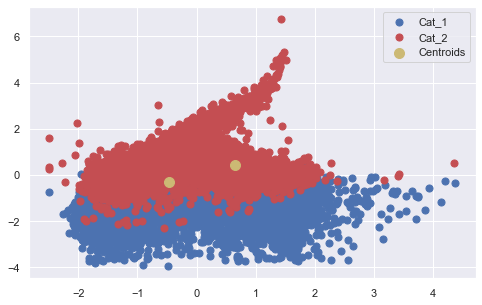

In [130]:
df_0 = df_cluster[df_cluster['Categories'] == 0]
df_1 = df_cluster[df_cluster['Categories'] == 1]

plt.figure(figsize=(8,5))

plt.scatter(df_0.iloc[:, 3], df_0.iloc[:, 4] , color = 'b', label = 'Cat_1', s= 50)

plt.scatter(df_1.iloc[:, 3], df_1.iloc[:, 4] , color = 'r', label = 'Cat_2', s= 50)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'y', label = 'Centroids', s = 100)

plt.legend()